In [1]:
!pip install diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 11.6 MB/s eta 0:00:00


In [6]:
from diffusers import SemanticStableDiffusionPipeline
import torch
import matplotlib.pyplot as plt

# Initialize the device (e.g., 'cuda' or 'cpu')
device = 'cuda'

# Load the Diffusion Model pipeline
pipe = SemanticStableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5").to(device)

# Define the prompts and editing prompts
prompts = [
    "The children discover an ancient map hidden beneath a moss-covered rock.",
    "Armed with the map, the children follow a winding path deeper into the forest.",
    "As they journey further, the children encounter a hidden cave obscured by thick foliage.",
    "Inside the cave, the children uncover a treasure chest filled with glittering jewels and ancient artifacts."
]

editing_prompts = [
    "The children eagerly lift the moss-covered rock and uncover the ancient map.",
    "With the map in hand, the children set off along the winding forest path.",
    "Through the dense foliage, the children stumble upon a hidden cave entrance.",
    "Inside the cave, the children's eyes widen as they discover the treasure chest."
]

# Set up the generator
gen = torch.Generator(device=device)

# Set a seed for reproducibility (optional)
gen.manual_seed(21)


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Number of generated images: 4
Displaying image 1/4
Displaying image 2/4
Displaying image 3/4
Displaying image 4/4


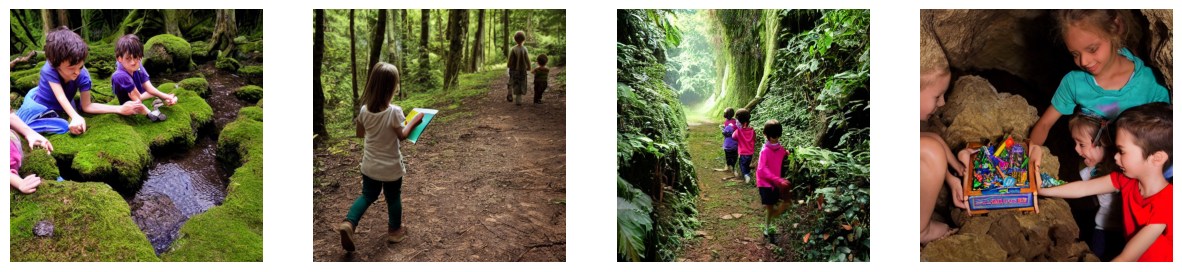

In [7]:
# Generate images based on the prompts and editing prompts
images = []
for prompt, editing_prompt in zip(prompts, editing_prompts):
    try:
        out = pipe(
            prompt=prompt,
            generator=gen,
            num_images_per_prompt=1,
            guidance_scale=7,
            editing_prompt=[editing_prompt],
            reverse_editing_direction=[False],
            edit_warmup_steps=[10],
            edit_guidance_scale=[4],  # Ensure this is of the correct data type
            edit_threshold=[0.99],
            edit_momentum_scale=0.3,
            edit_mom_beta=0.6,
            edit_weights=[1]
        )
        images.extend(out.images)
    except Exception as e:
        print(f"Error generating images: {e}")

# Display all generated images
num_images = len(images)
print(f"Number of generated images: {num_images}")

plt.figure(figsize=(15, 10))
for i, image in enumerate(images):
    print(f"Displaying image {i+1}/{num_images}")
    plt.subplot(1, num_images, i + 1)
    plt.imshow(image)
    plt.axis('off')
plt.show()

In [8]:
num_images = len(images)
print(f"Number of generated images: {num_images}")

Number of generated images: 4
